### Импорт библиотек

In [220]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


### Загрузка данных

In [221]:
churn_df = pd.read_csv("telecom_churn_clean.csv")
print(churn_df)

      Unnamed: 0  account_length  area_code  international_plan  \
0              0             128        415                   0   
1              1             107        415                   0   
2              2             137        415                   0   
3              3              84        408                   1   
4              4              75        415                   1   
...          ...             ...        ...                 ...   
3328        3328             192        415                   0   
3329        3329              68        415                   0   
3330        3330              28        510                   0   
3331        3331             184        510                   1   
3332        3332              74        415                   0   

      voice_mail_plan  number_vmail_messages  total_day_minutes  \
0                   1                     25              265.1   
1                   1                     26              161

In [222]:
X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
print(X.shape, y.shape)

(3333, 2) (3333,)


In [223]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=15)

### Предсказание на неразмеченных данных

In [224]:
X_new = np.array([
    [56.8, 17.5],
    [24.4, 24.1],
    [50.1, 10.9]
])
print(X_new.shape)

(3, 2)


In [225]:
predictions = knn.predict(X_new)
print("Predictions: {}".format(predictions))

Predictions: [1 0 0]


In [226]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.872


In [227]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

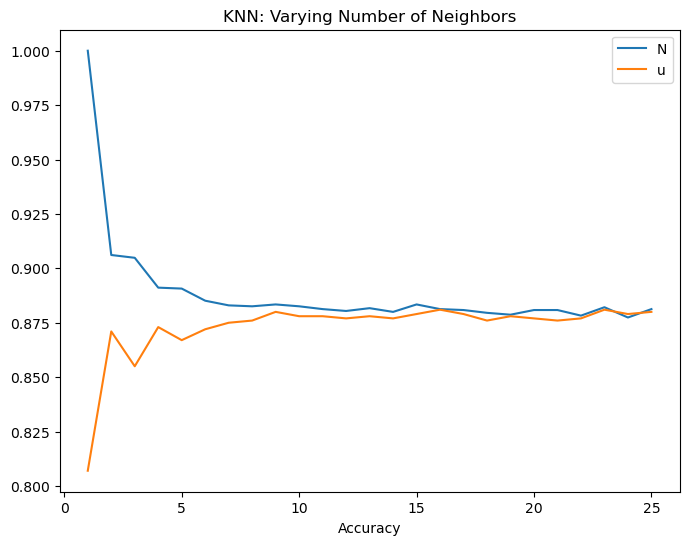

In [228]:
plt.figure(figsize=(8,6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend("Number of Neighbors")
plt.xlabel("Accuracy")
plt.show()

In [229]:
import pandas as pd
diabetes_df = pd.read_csv("diabetes_clean.csv")
print(diabetes_df.head(3))

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   

   diabetes  
0         1  
1         0  
2         1  


In [230]:
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [231]:
X_bmi = X[:, 3]
print(y.shape, X_bmi.shape)

(768,) (768,)


In [232]:
X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)

(768, 1)


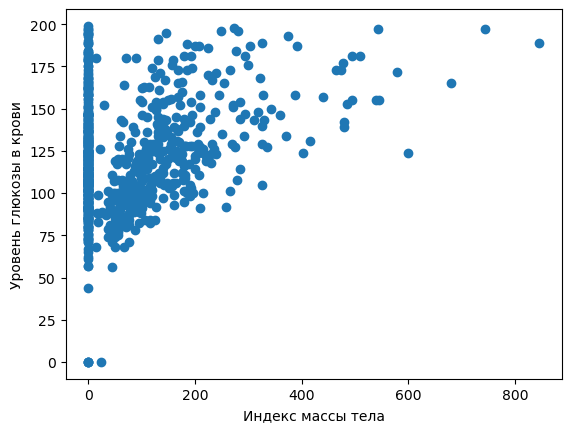

In [233]:
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y)
plt.ylabel("Уровень глюкозы в крови")
plt.xlabel("Индекс массы тела")
plt.show()

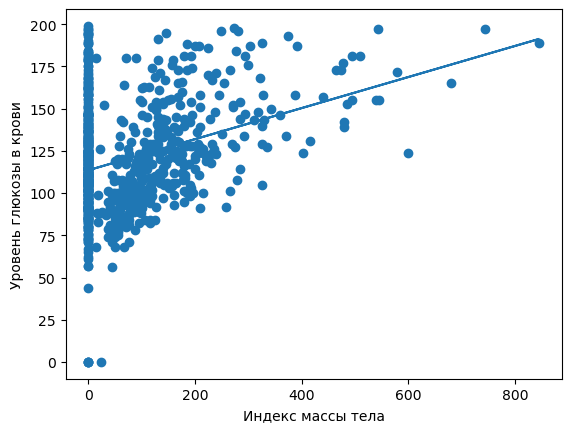

In [234]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel("Уровень глюкозы в крови")
plt.xlabel("Индекс массы тела")
plt.show()

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train , X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [236]:
reg_all.score(X_test, y_test)

0.28280468810375115

In [237]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

26.341459582232265

In [238]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)

In [239]:
print(cv_results)

[0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]


In [240]:
print(np.mean(cv_results), np.std(cv_results))

0.31909697867344783 0.07015320610114195


In [241]:
print(np.quantile(cv_results, [0.025, 0.975]))

[0.24088592 0.41580685]


In [242]:
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)

[0.282846662322222, 0.28320633574804754, 0.2853000732200006, 0.26423984812668133, 0.19292424694100951]


In [243]:
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)

[0.2831114455475573, 0.29795609755827845, 0.17989838789273882, 0.18127361610181125, 0.15679544303617987]


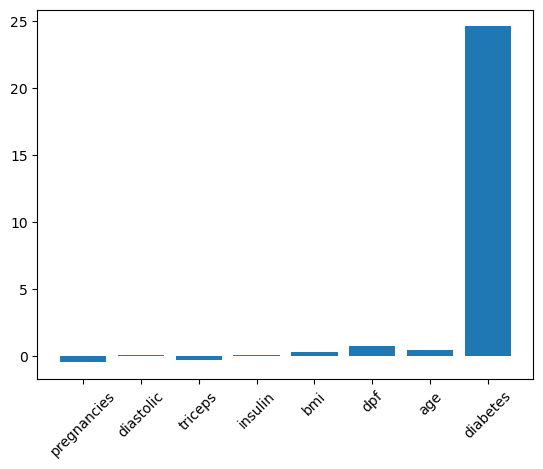

In [244]:
from sklearn.linear_model import Lasso
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
names = diabetes_df.drop("glucose", axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

In [245]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
churn_df = pd.read_csv("telecom_churn_clean.csv")
X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[1111   27]
 [ 142   54]]


In [246]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1138
           1       0.67      0.28      0.39       196

    accuracy                           0.87      1334
   macro avg       0.78      0.63      0.66      1334
weighted avg       0.85      0.87      0.85      1334



In [247]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [248]:
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
print(y_pred_probs[0])

0.18826020038112667


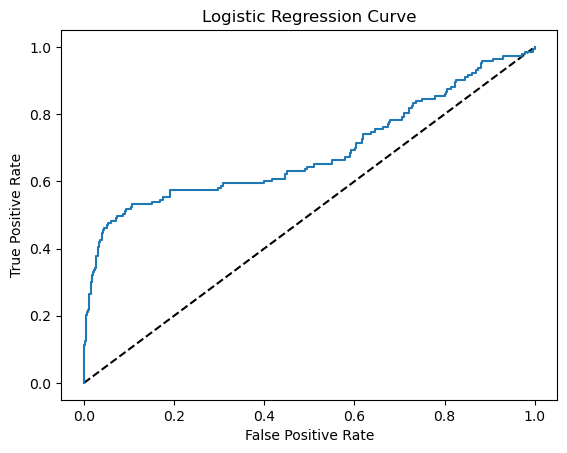

In [249]:
from sklearn.metrics import roc_curve
fpr, tpr, tresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression Curve")
plt.show()

In [250]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.6870364174914934


In [251]:
from sklearn.model_selection import GridSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {"alpha": np.arange(0.0001, 1, 10),
              "solver": ["sag", "lsqr"]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': 0.0001, 'solver': 'sag'} 0.03525640977376052


In [252]:
from sklearn.model_selection import RandomizedSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {"alpha": np.arange(0.0001, 1, 10),
              "solver": ["sag", "lsqr"]}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'lsqr', 'alpha': 0.0001} 0.03525257192862685


In [253]:
test_score = ridge_cv.score(X_test, y_test)
print(test_score)

0.06901063175283939


In [254]:
music_df = pd.read_csv("music_clean.csv")

In [255]:
print(music_df.columns)

Index(['Unnamed: 0', 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'genre'],
      dtype='object')


In [256]:
import pandas as pd
music_df = pd.read_csv("music_clean.csv")
print(music_df["genre"])
#music_dummies = pd.get_dummies(music_df["genre"], drop_first=False)
#print(music_dummies)
#music_dummies = pd.concat([music_df, music_dummies], axis=1)
#print(music_dummies.columns)

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: genre, Length: 1000, dtype: int64


## Деревья

In [257]:
wbc = pd.read_csv("wbc.csv")
#X = churn_df[["total_day_charge", "total_eve_charge"]].values

X = wbc.drop("diagnosis", axis=1).values
y = wbc["diagnosis"].values
print(X.shape, y.shape)

(569, 32) (569,)


In [258]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

dt = DecisionTreeClassifier(max_depth=2, random_state=1)

In [259]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9035087719298246


In [260]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
dt = DecisionTreeClassifier(criterion="gini", random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9385964912280702


In [266]:
auto = pd.read_csv("auto.csv")

X = auto["displ"].values
X = X.reshape(-1, 1)
y = auto["mpg"].values
print(X.shape, y.shape)

(392, 1) (392,)


In [267]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
dt = DecisionTreeRegressor(max_depth=4, random_state=1, min_samples_leaf=0.1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mse_dt = MSE(y_test, y_pred)
rmse_dt = mse_dt**0.5
print(rmse_dt)

4.43936754172627
